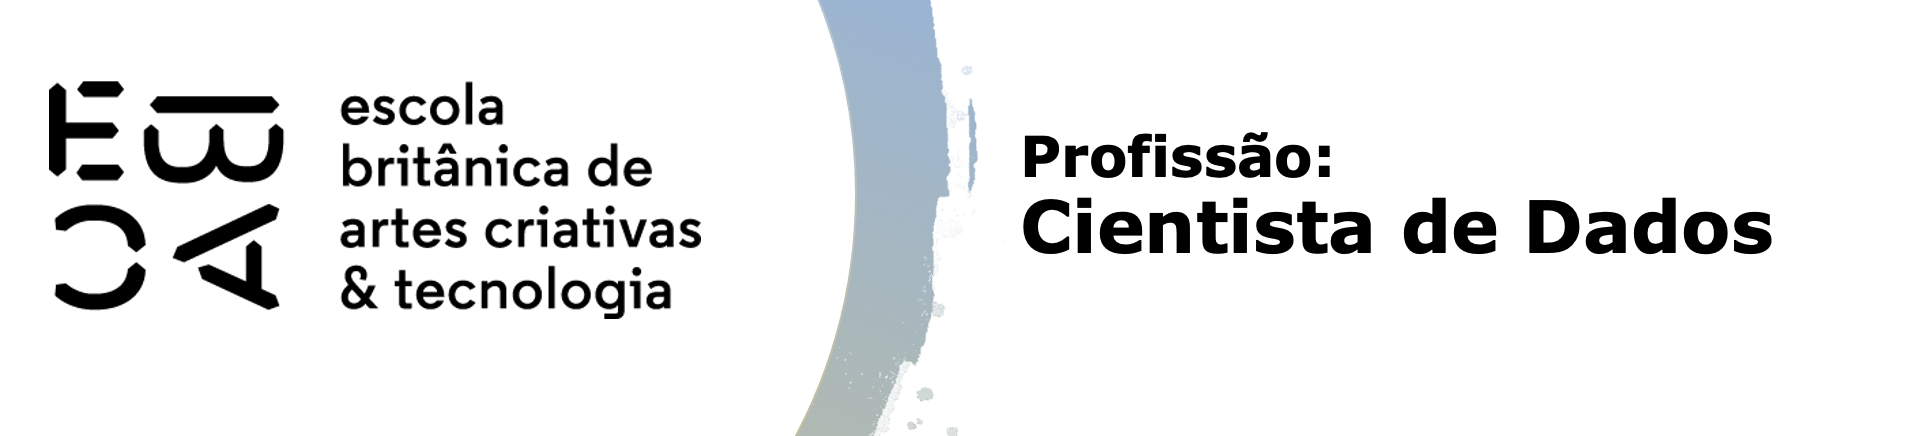

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

CARREGANDO A BASE DE TREINO:

In [2]:
# Carregar base features.txt em uma Series

features = pd.read_csv('./UCI HAR Dataset/features.txt', header=None, sep=' ', usecols=[1])

#Carregue a base subject_train.txt em uma Series

subject = pd.read_csv('./UCI HAR Dataset/train/subject_train.txt', header=None, delim_whitespace=True)

# Carrega o arquivo X_train.txt

#aça com que as colunas deste dataframe tenham os nomes indicados em features.txt

X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)


In [3]:
X_train.columns = features[1]
X_train['Subject_train'] = subject
X_train['order'] = range(1, len(X_train) + 1)
X_train = X_train.set_index(['order', 'Subject_train'])
X_train.head()

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
order,Subject_train,,,,,,,,,,,,,,,,,,,,,
1,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
Y_train = pd.read_csv('./UCI HAR Dataset/train/Y_train.txt', header=None, delim_whitespace=True)
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


CARREGANDO A BASE DE TESTE:

In [5]:
# Carregar base features.txt em uma Series

features = pd.read_csv('./UCI HAR Dataset/features.txt', header=None, sep=' ', usecols=[1])

#Carregue a base subject_train.txt em uma Series

subject_test = pd.read_csv('./UCI HAR Dataset/test/subject_test.txt', header=None, delim_whitespace=True)

# Carrega o arquivo X_train.txt

#aça com que as colunas deste dataframe tenham os nomes indicados em features.txt

X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)

In [6]:
X_test.columns = features[1]
X_test['Subject_test'] = subject_test
X_test['order'] = range(1, len(X_test) + 1)
X_test = X_test.set_index(['order', 'Subject_test'])
X_test.head()

,1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
order,Subject_test,,,,,,,,,,,,,,,,,,,,,
1,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
2,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
3,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
4,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
5,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [7]:
Y_test = pd.read_csv('./UCI HAR Dataset/test/Y_test.txt', header=None, delim_whitespace=True)
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [8]:
X_train = X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']]

In [9]:
X_test = X_test[['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']]

In [10]:
inicio = time.time()
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
fim = time.time()
print(f'O tempo de processamento foi de: {round(fim - inicio,4)} segundos')

O tempo de processamento foi de: 0.0166 segundos


In [11]:
ccp_alphas

array([0.00000000e+00, 5.44995104e-06, 6.59151729e-06, 7.01879270e-06,
       1.00688213e-05, 1.13157341e-05, 1.16014850e-05, 1.20819934e-05,
       1.71709922e-05, 2.04026115e-05, 2.18260495e-05, 2.24204522e-05,
       3.49759055e-05, 3.50019444e-05, 3.81726280e-05, 3.84049158e-05,
       3.90792056e-05, 4.14529250e-05, 4.76060936e-05, 4.85876625e-05,
       6.11350980e-05, 6.41224934e-05, 6.43815742e-05, 7.76436703e-05,
       8.49884806e-05, 9.12180251e-05, 9.59158433e-05, 9.65080080e-05,
       9.69088102e-05, 9.86692744e-05, 9.95342357e-05, 1.01346036e-04,
       1.01996980e-04, 1.08813928e-04, 1.23714934e-04, 1.25847466e-04,
       1.50361815e-04, 1.54976359e-04, 1.75326218e-04, 1.84844173e-04,
       1.91557853e-04, 2.06206067e-04, 2.16923939e-04, 2.19877768e-04,
       2.21614574e-04, 2.23514503e-04, 2.32384455e-04, 2.32854113e-04,
       2.34521016e-04, 2.34706577e-04, 2.38283524e-04, 2.41444531e-04,
       2.73146473e-04, 2.73278161e-04, 2.74993939e-04, 3.05982310e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [12]:
clf = DecisionTreeClassifier(random_state=2360873)

In [13]:
grid_parametros = {'ccp_alpha':ccp_alphas}

In [14]:
inicio = time.time()
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train, Y_train) 
fim = time.time()
print(f'O tempo de processamento foi de: {round(fim - inicio, 2)} segundos')

Fitting 10 folds for each of 114 candidates, totalling 1140 fits
[CV 1/10; 1/114] START ccp_alpha=0.0............................................
[CV 1/10; 1/114] END .............ccp_alpha=0.0;, score=0.758 total time=   0.0s
[CV 2/10; 1/114] START ccp_alpha=0.0............................................
[CV 2/10; 1/114] END .............ccp_alpha=0.0;, score=0.772 total time=   0.0s
[CV 3/10; 1/114] START ccp_alpha=0.0............................................
[CV 3/10; 1/114] END .............ccp_alpha=0.0;, score=0.811 total time=   0.0s
[CV 4/10; 1/114] START ccp_alpha=0.0............................................
[CV 4/10; 1/114] END .............ccp_alpha=0.0;, score=0.673 total time=   0.0s
[CV 5/10; 1/114] START ccp_alpha=0.0............................................
[CV 5/10; 1/114] END .............ccp_alpha=0.0;, score=0.732 total time=   0.0s
[CV 6/10; 1/114] START ccp_alpha=0.0............................................
[CV 6/10; 1/114] END .............ccp_alpha=

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [15]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head(105)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014119,0.000536,0.000901,3.004988e-04,0.0,{'ccp_alpha': 0.0},0.758152,0.771739,0.810884,0.673469,0.731973,0.767347,0.780952,0.765986,0.810884,0.752381,0.762377,0.037581,78
1,0.014194,0.000452,0.001000,3.568323e-07,0.000005,{'ccp_alpha': 5.449951042985827e-06},0.758152,0.771739,0.810884,0.673469,0.731973,0.767347,0.780952,0.765986,0.810884,0.752381,0.762377,0.037581,78
2,0.014073,0.000569,0.000926,5.488781e-04,0.000007,{'ccp_alpha': 6.591517289341751e-06},0.758152,0.771739,0.810884,0.673469,0.731973,0.767347,0.780952,0.765986,0.810884,0.752381,0.762377,0.037581,78
3,0.014033,0.000490,0.000934,3.271744e-04,0.000007,{'ccp_alpha': 7.018792704259621e-06},0.758152,0.771739,0.810884,0.673469,0.731973,0.767347,0.780952,0.765986,0.810884,0.752381,0.762377,0.037581,78
4,0.014671,0.000895,0.001025,4.532939e-04,0.00001,{'ccp_alpha': 1.0068821276655799e-05},0.758152,0.771739,0.810884,0.673469,0.731973,0.767347,0.780952,0.765986,0.810884,0.752381,0.762377,0.037581,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.015438,0.001091,0.001019,4.751714e-04,0.002516,{'ccp_alpha': 0.0025162645340328083},0.820652,0.831522,0.825850,0.774150,0.726531,0.755102,0.843537,0.697959,0.882993,0.718367,0.787666,0.058744,9
101,0.014736,0.000712,0.001013,3.250760e-05,0.003105,{'ccp_alpha': 0.003104595140805671},0.813859,0.831522,0.828571,0.774150,0.726531,0.802721,0.858503,0.745578,0.881633,0.688435,0.795150,0.057737,5
102,0.014454,0.000866,0.000602,4.914458e-04,0.003274,{'ccp_alpha': 0.0032737840721853585},0.813859,0.815217,0.828571,0.774150,0.726531,0.802721,0.836735,0.745578,0.873469,0.688435,0.790527,0.053452,8
103,0.014257,0.000469,0.000802,4.010454e-04,0.004474,{'ccp_alpha': 0.004473982400454893},0.794837,0.846467,0.869388,0.787755,0.723810,0.804082,0.838095,0.763265,0.888435,0.688435,0.800457,0.060032,1


In [16]:
grid.best_params_

{'ccp_alpha': 0.004473982400454893}

In [17]:
grid.best_score_

0.8004569653948537

In [18]:
grid.best_index_

103

In [19]:
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, Y_train)

In [20]:
clf.score(X_test, Y_test)

0.7119104173736003

In [21]:
melhor_arvore = clf
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.004473982400454893, random_state=2360873)

Acurácia: 71.19


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


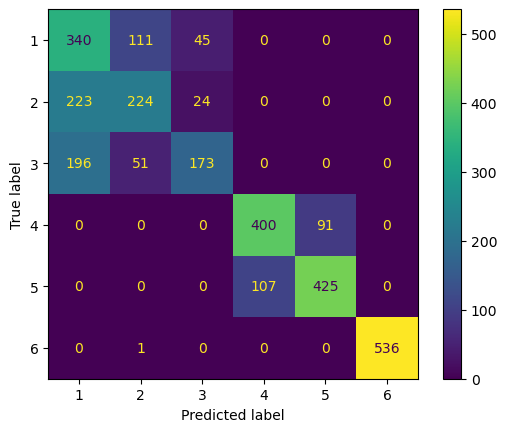

In [22]:
acuracia_teste = melhor_arvore.score(X_test, Y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, Y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

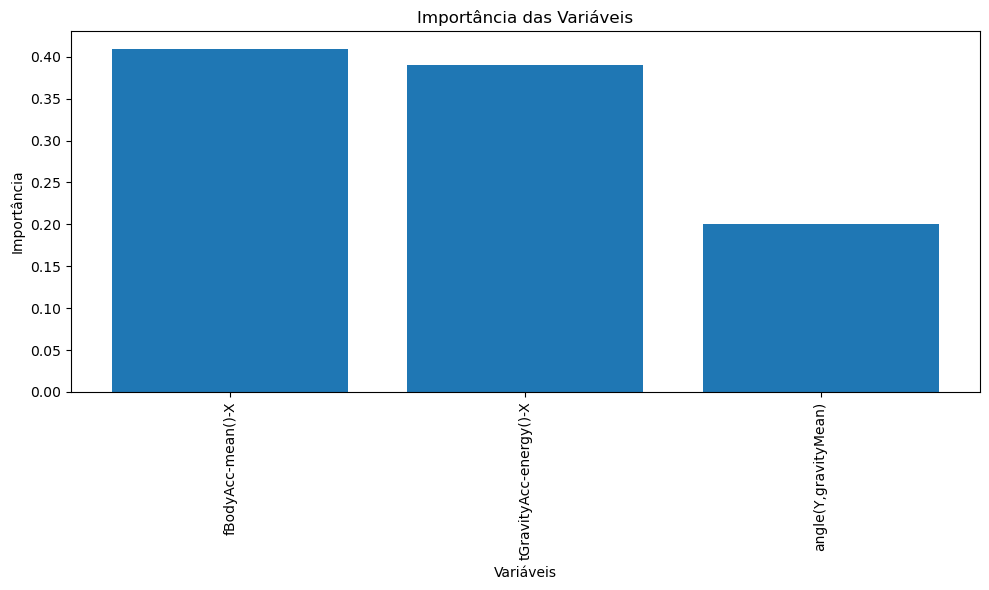

In [29]:
# Treinamento da árvore de decisão

clf = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)

clf.fit(X_train, Y_train)


# Obtendo as importâncias das variáveis

importances = clf.feature_importances_


# Obtendo os nomes das variáveis

feature_names = X_train.columns


# Ordenando as importâncias e os nomes das variáveis em ordem decrescente

indices = np.argsort(importances)[::-1]

importances_sorted = importances[indices]

feature_names_sorted = feature_names[indices]


# Plotando o gráfico de barras das importâncias das variáveis

plt.figure(figsize=(10, 6))

plt.bar(range(len(importances_sorted)), importances_sorted)

plt.xticks(range(len(importances_sorted)), feature_names_sorted, rotation=90)

plt.xlabel('Variáveis')

plt.ylabel('Importância')

plt.title('Importância das Variáveis')

plt.tight_layout()

plt.show()




In [31]:
feature_names_sorted

Index(['fBodyAcc-mean()-X', 'tGravityAcc-energy()-X', 'angle(Y,gravityMean)'], dtype='object', name=1)

In [32]:
X_train = pd.get_dummies(X_train[["fBodyAcc-mean()-X", "tGravityAcc-energy()-X", "angle(Y,gravityMean)"]])

In [33]:
clf2 = DecisionTreeClassifier(min_samples_leaf=20, max_depth=4).fit(X_train, Y_train)

In [34]:
melhor_arvore = clf2
melhor_arvore

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [36]:
clf2.score(X_test, Y_test)

C:\Users\lucca\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.3752969121140142

Acurácia: 37.53


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
C:\Users\lucca\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lucca\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


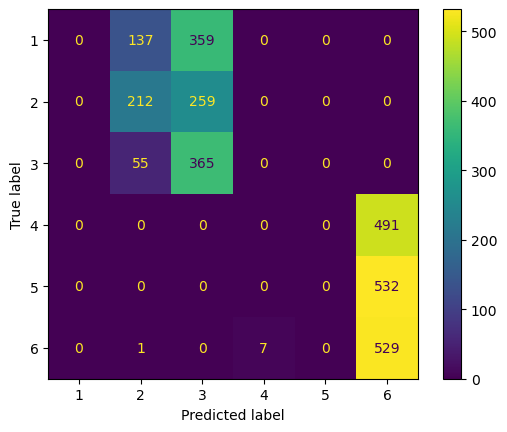

In [35]:
acuracia_teste = melhor_arvore.score(X_test, Y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, Y_test);

As atividades 4, 5 e 6 foram preditras com excelente percentual de acerto, porém as outras nem tanto. Por exemplo a atividade 01 não foi definida de forma correta nenhuma vez.